In [10]:
import ee
import ee
import matplotlib.pyplot as plt
import numpy as np



In [17]:
ee.Authenticate()
name = 'ee-firiusz123'
ee.Initialize(project=name)

print(ee.ImageCollection('COPERNICUS/S2').first().getInfo())



{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [1830, 1830], 'crs': 'EPSG:32631', 'crs_transform': [60, 0, 300000, 0, -60, 3100020]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32631', 'crs_transform': [10, 0, 300000, 0, -10, 3100020]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32631', 'crs_transform': [10, 0, 300000, 0, -10, 3100020]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32631', 'crs_transform': [10, 0, 300000, 0, -10, 3100020]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [5490, 5490], 'crs': 'EPSG:32631', 'crs_transform': [20, 0, 300000, 0, -20, 3100020

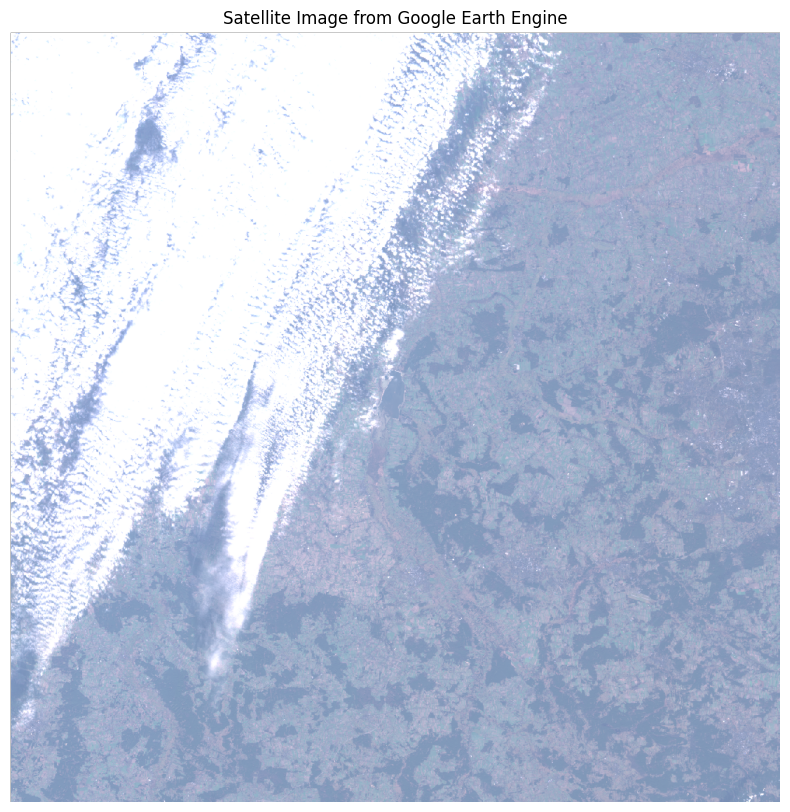

In [23]:
import ee
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO

# Step 1: Authenticate and initialize
ee.Authenticate()
ee.Initialize(project=name)

# Step 2: Define a smaller Area of Interest (AOI)
# Replace with your coordinates (longitude, latitude)
aoi = ee.Geometry.Point([19.1451, 51.9194])  # Example: Point in Poland

# Step 3: Get the image from the Sentinel-2 Image Collection with filters
image = ee.ImageCollection('COPERNICUS/S2') \
    .filterBounds(aoi) \
    .filterDate('2023-01-01', '2023-01-31') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
    .first()  # Get the first image

# Step 4: Select RGB bands (B4, B3, B2 for Sentinel-2)
rgb_image = image.select(['B4', 'B3', 'B2'])

# Step 5: Get a URL to the image with reduced scale
url = rgb_image.getThumbUrl({'min': 0, 'max': 3000, 'scale': 100})  # Adjust scale to reduce size

# Step 6: Fetch the image from the URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Step 7: Convert the image to a numpy array
img_array = np.array(img)

# Step 8: Plot the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_array)
plt.axis('off')  # Turn off axis labels
plt.title('Satellite Image from Google Earth Engine')
plt.show()


In [25]:
import ee
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO

# Step 1: Authenticate and initialize
ee.Authenticate()
ee.Initialize(project=name)

# Step 2: Define a smaller Area of Interest (AOI)
# Example: Replace with a specific bounding box around a city or region
aoi = ee.Geometry.Rectangle([19.0, 51.8, 19.3, 52.0])  # Adjust the coordinates as needed

# Step 3: Get the image from the Sentinel-2 Image Collection with filters
image = ee.ImageCollection('COPERNICUS/S2') \
    .filterBounds(aoi) \
    .filterDate('2023-01-01', '2023-01-31') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 5)) \
    .first()  # Get the first image

# Step 4: Select RGB bands (B4, B3, B2 for Sentinel-2)
rgb_image = image.select(['B4', 'B3', 'B2'])

# Step 5: Get a URL to the image with reduced scale for higher resolution
url = rgb_image.getThumbUrl({'min': 0, 'max': 3000, 'scale': 10})  # Adjust scale for higher resolution

# Step 6: Fetch the image from the URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Step 7: Convert the image to a numpy array
img_array = np.array(img)

# Step 8: Plot the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_array)
plt.axis('off')  # Turn off axis labels
plt.title('High-Resolution Satellite Image from Google Earth Engine')
plt.show()


EEException: Image.select: Parameter 'input' is required.

C:\Users\11\AppData\Local\Temp\ipykernel_15320\1665777025.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_img = img.resize(target_size, Image.ANTIALIAS)


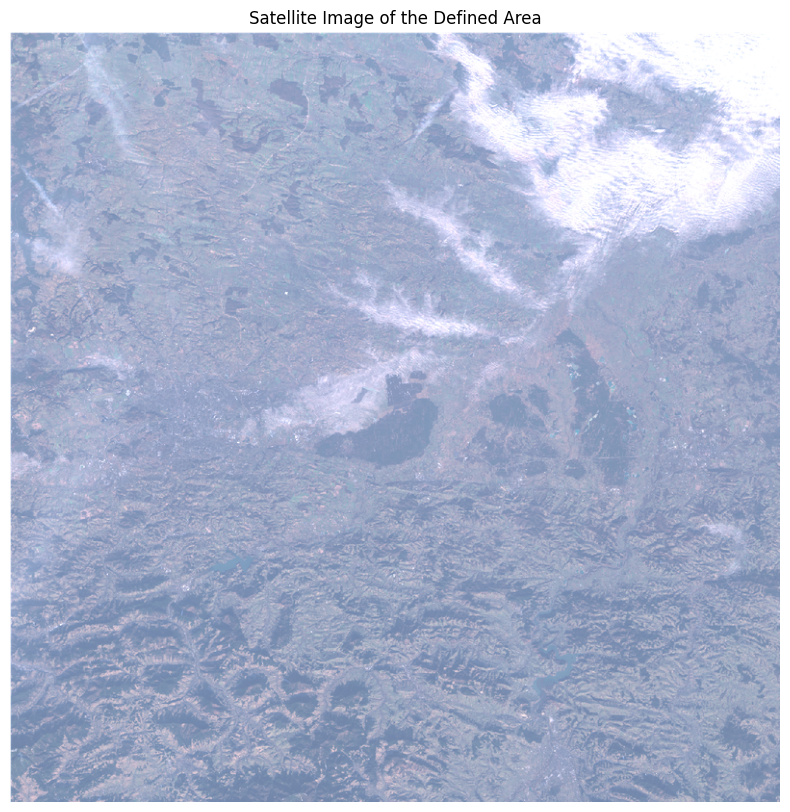

In [33]:
import ee
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO

# Step 1: Authenticate and initialize
ee.Authenticate()
ee.Initialize(project=name)

# Step 2: Define the geometry for the area of interest (the rectangle)
geometry = ee.Geometry.Polygon(
    [[[19.90496095465271, 50.07236564089694],
      [19.90496095465271, 50.06744880132032],
      [19.917384946809694, 50.06744880132032],
      [19.917384946809694, 50.07236564089694]]], None, False)

# Step 3: Get the image from the Sentinel-2 Image Collection with filters
image_collection = ee.ImageCollection('COPERNICUS/S2') \
    .filterBounds(geometry) \
    .filterDate('2023-01-01', '2023-01-31') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))  # Less than 10% cloud cover

# Get the first image
image = image_collection.first()

# Check if the image exists
if image is not None:
    # Select RGB bands (B4, B3, B2 for Sentinel-2)
    rgb_image = image.select(['B4', 'B3', 'B2'])

    # Get a URL to the image with reduced scale for higher resolution
    url = rgb_image.getThumbUrl({'min': 0, 'max': 3000, 'scale': 100})

    # Fetch the image from the URL
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Resize the image (optional)
    target_size = (800, 800)  # New size (width, height)
    resized_img = img.resize(target_size, Image.ANTIALIAS)

    # Convert the resized image to a numpy array
    img_array = np.array(resized_img)

    # Plot the resized image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img_array)
    plt.axis('off')  # Turn off axis labels
    plt.title('Satellite Image of the Defined Area')
    plt.show()

else:
    print("No images found for the specified criteria.")


In [34]:
import ee
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Initialize the Earth Engine module
ee.Initialize(project=name)

# Define your rectangle geometry (replace with your coordinates)
rectangle = ee.Geometry.Rectangle([xmin, ymin, xmax, ymax])  # Adjust coordinates

# Create a Sentinel-2 image collection for a specific date range and area
sentinel2_collection = ee.ImageCollection('COPERNICUS/S2') \
    .filterBounds(rectangle) \
    .filterDate('2022-01-01', '2022-12-31')  # Adjust date range as needed

# Select a single image (e.g., the first image in the collection)
sentinel2_image = sentinel2_collection.first()

# Select RGB bands
rgb_bands = sentinel2_image.select(['B4', 'B3', 'B2'])

# Define a region for the image and scale
region = rectangle.getInfo()['coordinates']
scale = 10  # Sentinel-2 has a resolution of 10 meters

# Get the image as a NumPy array
image_array = rgb_bands.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=rectangle,
    scale=scale,
    maxPixels=1e13
).getInfo()

# Convert the image to a format compatible with Pillow
# Normalize the image values to be in the range of 0-255 for visualization
array = np.array([image_array['B4'], image_array['B3'], image_array['B2']]).transpose(1, 2, 0)
array = (array / np.max(array) * 255).astype(np.uint8)

# Create a PIL image and display it
image = Image.fromarray(array)
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


NameError: name 'xmin' is not defined

In [9]:
import ee
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO

# Step 1: Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Step 2: Define the geometry for the area of interest (the rectangle)
geometry = ee.Geometry.Polygon(
    [[[19.90496095465271, 50.07236564089694],
      [19.90496095465271, 50.06744880132032],
      [19.917384946809694, 50.06744880132032],
      [19.917384946809694, 50.07236564089694]]])

# Step 3: Get the image from the Sentinel-2 Image Collection with filters
image_collection = ee.ImageCollection('COPERNICUS/S2') \
    .filterBounds(geometry) \
    .filterDate('2023-01-01', '2023-01-31') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))  # Less than 10% cloud cover

# Get the first image
image = image_collection.first()

# Check if the image exists
if image:
    # Select RGB bands (B4, B3, B2 for Sentinel-2)
    rgb_image = image.select(['B4', 'B3', 'B2'])

    # Step 4: Get the URL for a 1200x800 pixel thumbnail image
    url = rgb_image.getThumbURL({
        'region': geometry,  # Define the region of interest
        'dimensions': '4500x2200',  # Image size (width x height)
        'format': 'png',  # Image format
        'min': 0,  # Minimum reflectance value
        'max': 3000,  # Maximum reflectance value
    })

    # Step 5: Fetch the image using the URL
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Step 6: Display the image using Matplotlib
    plt.figure(figsize=(10, 6))  # Aspect ratio 1200x800
    plt.imshow(img_array)
    plt.axis('off')  # Turn off axis labels
    plt.title('Sentinel-2 Image (1200x800)')
    plt.show()

else:
    print("No images found for the specified criteria.")



EEException: Total request size (59400000 bytes) must be less than or equal to 50331648 bytes.

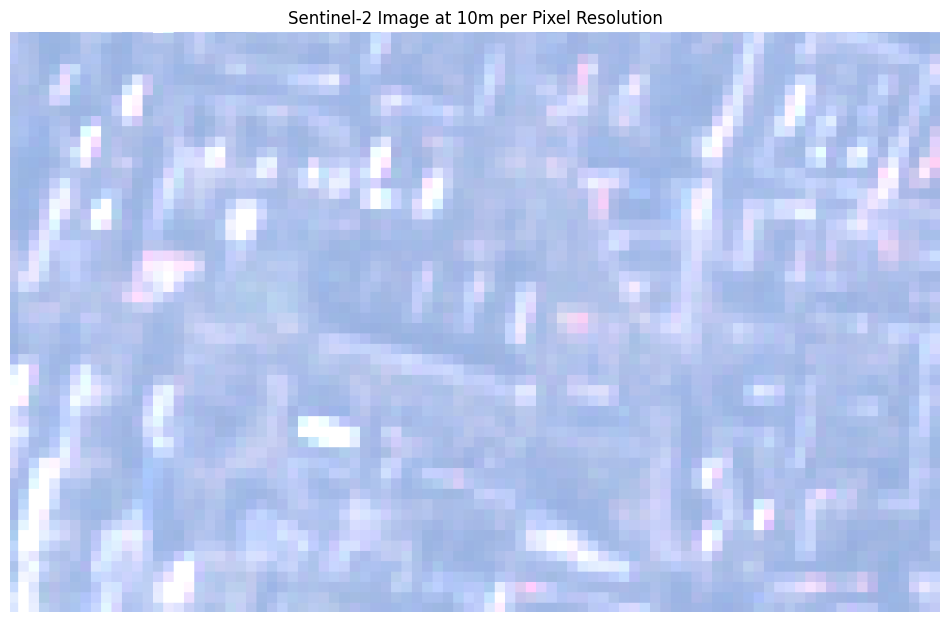

In [15]:
import ee
import requests  # Add this if you haven't imported it already
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO

# Step 1: Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Step 2: Define the geometry for the area of interest (the rectangle)
geometry = ee.Geometry.Polygon(
    [[[19.90496095465271, 50.07236564089694],
      [19.90496095465271, 50.06744880132032],
      [19.917384946809694, 50.06744880132032],
      [19.917384946809694, 50.07236564089694]]])

# Step 3: Get the image from the Sentinel-2 Image Collection with filters
image_collection = ee.ImageCollection('COPERNICUS/S2') \
    .filterBounds(geometry) \
    .filterDate('2023-01-01', '2023-01-31') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))  # Less than 10% cloud cover

# Get the first image
image = image_collection.first()

# Check if the image exists
if image:
    # Select RGB bands (B4, B3, B2 for Sentinel-2)
    rgb_image = image.select(['B4', 'B3', 'B2'])

    # Step 4: Get the URL for the image using scale (10 meters per pixel)
    url = rgb_image.getThumbURL({
        'region': geometry,  # Define the region of interest
        'scale': 1,  # 10 meters per pixel (Sentinel-2 resolution)
        'format': 'png',  # Image format
        'min': 0,  # Minimum reflectance value
        'max': 2500,  # Adjusted maximum reflectance value to avoid saturation
    })

    # Step 5: Fetch the image from the URL
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Step 6: Display the image using Matplotlib
    plt.figure(figsize=(12, 8))  # Size in inches (this is 12x8 inches)
    plt.imshow(img_array)
    plt.axis('off')  # Turn off axis labels
    plt.title('Sentinel-2 Image at 10m per Pixel Resolution')

    # Step 7: Save the plot to a file with desired resolution
    plt.savefig('sentinel_image_rescaled.png', format='png', bbox_inches='tight', dpi=2300)  # Adjusted dpi for good quality

    plt.show()

else:
    print("No images found for the specified criteria.")
